# uppercase #

Hypothese: Die Nutzung von Wörtern, die komplett groß geschrieben werden hat einfluss auf die Fehlerrate, da das Model diesen Wörtern eine negative Konnutation zuschreibt.

Grund: Statische Analyse
TODO: BSP

In [2]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [3]:
def all(c):
    return True
def uppercase_average_word(tokens):
    return uppercase_words(tokens) / len(tokens) * 100
def uppercase_words(tokens):
    counter = 0
    for word in tokens:
        if word.text.isupper():
            counter += 1;
    return counter
def lowercase_average_word(tokens):
    return lowercase_words(tokens) / len(tokens) * 100
def lowercase_words(tokens):
    counter = 0
    for word in tokens:
        if word.islower():
            counter += 1;
    return counter
def generate_filter(fr, to, filter_function):
    def f(element):
        ld = filter_function(element['tokens'])
        if ld >= fr and ld < to:
            return True
        return False
    return f

def add_filter_interval(filter_list, start, stop, step, func):
    for i in range(start, stop, step):
        filter_list.append(('%s-%s' % (i, i+step-1),generate_filter(i, i+step, func)))

In [ ]:
show_data(contains_question)

uppercase word count


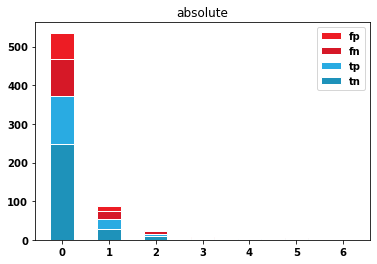

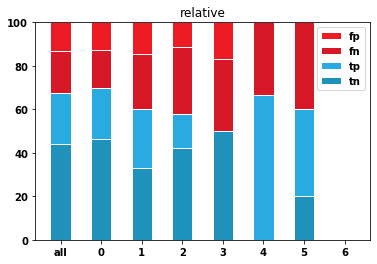

In [8]:
uppercase_filters = []
uppercase_filters.append(('all', all))
step = 1
for i in range(0, 7, step):
    uppercase_filters.append(('%s' % (i),generate_filter(i, i+step, uppercase_words)))

#name, filters, relative
print('uppercase word count')
create_plt(name = "absolute", filters = uppercase_filters[1:], relative = False)
create_plt(name = "relative", filters = uppercase_filters, relative = True)

In [10]:
print('All')
show_metrics(calc_metrics())
print('1-4')
show_metrics(calc_metrics(generate_filter(1, 20, uppercase_words)))
print('Verbesserung 1-4')
show_metrics(calc_metric_difference(calc_metrics(generate_filter(1, 20, uppercase_words))))

All


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


1-4


,label hate (67),label nohate (67)
pred hate (52),32,20
pred nohate (82),35,47


accuracy,precision,recall,f1_score
0.5895522388059702,0.6153846153846154,0.47761194029850745,0.5378151260504201


Verbesserung 1-4


,label hate (287),label nohate (383)
pred hate (260),192,68
pred nohate (410),95,315


accuracy,precision,recall,f1_score
0.7567164179104477,0.7384615384615385,0.6689895470383276,0.7020109689213895


uppercase word count average


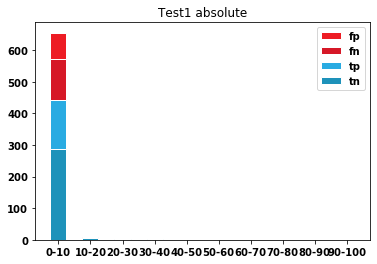

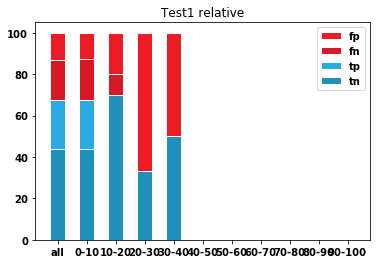

In [6]:
uppercase_average_filters = []
uppercase_average_filters.append(('all', all))
step = 10
for i in range(0, 100, step):
    uppercase_average_filters.append(('%s-%s' % (i, i+step),generate_filter(i, i+step, uppercase_average_word)))

#name, filters, relative
print('uppercase word count average')
create_plt(name = "Test1 absolute", filters = uppercase_average_filters[1:], relative = False)
create_plt(name = "Test1 relative", filters = uppercase_average_filters, relative = True)

In [7]:
print('All')
show_metrics(calc_metrics())
print('1-4')
show_metrics(calc_metrics(generate_filter(1, 4, uppercase_average_word)))
print('Verbesserung 1-4')
show_metrics(calc_metric_difference(calc_metrics(generate_filter(1, 4, uppercase_average_word))))

All


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


1-4


,label hate (43),label nohate (29)
pred hate (32),22,10
pred nohate (40),21,19


accuracy,precision,recall,f1_score
0.5694444444444444,0.6875,0.5116279069767442,0.5866666666666667


Verbesserung 1-4


,label hate (287),label nohate (383)
pred hate (256),178,78
pred nohate (414),109,305


accuracy,precision,recall,f1_score
0.7208955223880597,0.6953125,0.6202090592334495,0.6556169429097606
